# 前処理

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds

%matplotlib inline

/Users/masigara/.local/share/virtualenvs/jupyter-pnVMXwKv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## movielens100kのレーティングデータをロード

In [2]:
ds = tfds.load("movielens/100k-ratings")

In [3]:
# 全データをロード
df = tfds.as_dataframe(ds["train"])

## データの確認

In [4]:
df.head()

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,[7],b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,True,b'138',4,b'doctor',4.0,b'53211'
1,25.0,"[4, 14]",b'709',b'Strictly Ballroom (1992)',32.0,875654590,True,b'92',5,b'entertainment',2.0,b'80525'
2,18.0,[4],b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,True,b'301',17,b'student',4.0,b'55439'
3,50.0,"[5, 7]",b'56',b'Pulp Fiction (1994)',50.0,883326919,True,b'60',4,b'healthcare',4.0,b'06472'
4,50.0,"[10, 16]",b'895',b'Scream 2 (1997)',55.0,891409199,True,b'197',18,b'technician',3.0,b'75094'


In [5]:
df.shape

(100000, 12)

In [6]:
df.dtypes

bucketized_user_age      float64
movie_genres              object
movie_id                  object
movie_title               object
raw_user_age             float64
timestamp                  int64
user_gender                 bool
user_id                   object
user_occupation_label      int64
user_occupation_text      object
user_rating              float64
user_zip_code             object
dtype: object

In [7]:
df.describe()

,bucketized_user_age,raw_user_age,timestamp,user_occupation_label,user_rating
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,29.235460,32.969850,8.835289e+08,11.404320,3.529860
std,12.005927,11.562623,5.343856e+06,6.549283,1.125674
min,1.000000,7.000000,8.747247e+08,0.000000,1.000000
25%,18.000000,24.000000,8.794487e+08,6.000000,3.000000
50%,25.000000,30.000000,8.828269e+08,12.000000,4.000000
75%,35.000000,40.000000,8.882600e+08,17.000000,4.000000
max,56.000000,73.000000,8.932866e+08,21.000000,5.000000


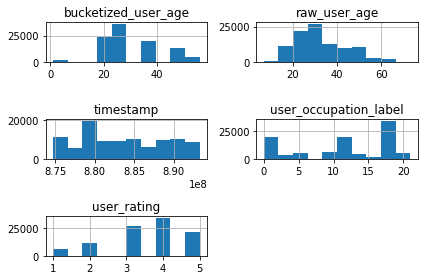

In [8]:
df.hist()
plt.tight_layout()

## レーティング情報のみ抽出

In [15]:
df_ratings = df[["user_id", "movie_id", "user_rating"]] \
    .astype({"user_id": "uint32", "movie_id": "uint16", "user_rating": "uint8"}) \
    .sort_values(["user_id", "movie_id"]) \
    .reset_index(drop=True)
df_ratings

,user_id,movie_id,user_rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
99995,943,1067,2
99996,943,1074,4
99997,943,1188,3
99998,943,1228,3


In [16]:
if not os.path.exists("../data"):
    os.mkdir("../data")

# csvに保存
df_ratings.to_csv("../data/movielens100k.csv")

### 以下参考

In [10]:
# movie_idをonehotに変換
df_onehot = pd.get_dummies(df_ratings, columns=["movie_id"])
df_onehot

,user_rating,movie_id_1,movie_id_2,movie_id_3,movie_id_4,movie_id_5,movie_id_6,movie_id_7,movie_id_8,movie_id_9,...,movie_id_1673,movie_id_1674,movie_id_1675,movie_id_1676,movie_id_1677,movie_id_1678,movie_id_1679,movie_id_1680,movie_id_1681,movie_id_1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# movie_idの列のみ選択
# locとilocが連続するのでcopy()をとっている
df_movie_id = df_onehot.loc[:, df_onehot.columns.str.startswith("movie_id")].copy()
df_movie_id

,movie_id_1,movie_id_2,movie_id_3,movie_id_4,movie_id_5,movie_id_6,movie_id_7,movie_id_8,movie_id_9,movie_id_10,...,movie_id_1673,movie_id_1674,movie_id_1675,movie_id_1676,movie_id_1677,movie_id_1678,movie_id_1679,movie_id_1680,movie_id_1681,movie_id_1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# movie_idのonehot vectorにレーティングをかけてからユーザごとに足し合わせることで、ユーザ‐アイテム行列を生成
for i in range(len(df_movie_id.columns)):
    df_movie_id.iloc[:, i] *= df_onehot["user_rating"]

df_preprocessed = df_movie_id.groupby("user_id").sum()
df_preprocessed

,movie_id_1,movie_id_2,movie_id_3,movie_id_4,movie_id_5,movie_id_6,movie_id_7,movie_id_8,movie_id_9,movie_id_10,...,movie_id_1673,movie_id_1674,movie_id_1675,movie_id_1676,movie_id_1677,movie_id_1678,movie_id_1679,movie_id_1680,movie_id_1681,movie_id_1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,2,0,0,4,5,3,0,...,0,0,0,0,0,0,0,0,0,0
941,5,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
